In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [14]:
import pandas as pd

data = pd.read_csv('housing.csv')

data.head(1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
995,-121.75,37.71,11.0,12070.0,2220.0,5826.0,2125.0,4.8624,192400.0,INLAND
996,-121.77,37.74,25.0,494.0,81.0,254.0,85.0,9.1531,418800.0,INLAND
997,-121.80,37.70,22.0,5533.0,943.0,2474.0,910.0,4.7361,216800.0,INLAND
998,-121.80,37.69,17.0,3956.0,639.0,2222.0,662.0,5.4324,215500.0,INLAND


In [15]:
housing = fetch_california_housing()
X_housing, y_housing = housing.data, housing.target

In [16]:
housing = fetch_california_housing()
X, y = housing.data, housing.target
print("Feature names:", housing.feature_names)
print("Dataset shape:", X.shape)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Dataset shape: (20640, 8)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [19]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
y_pred = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean Squared Error (MSE): 0.2567
R-squared (R²): 0.8044


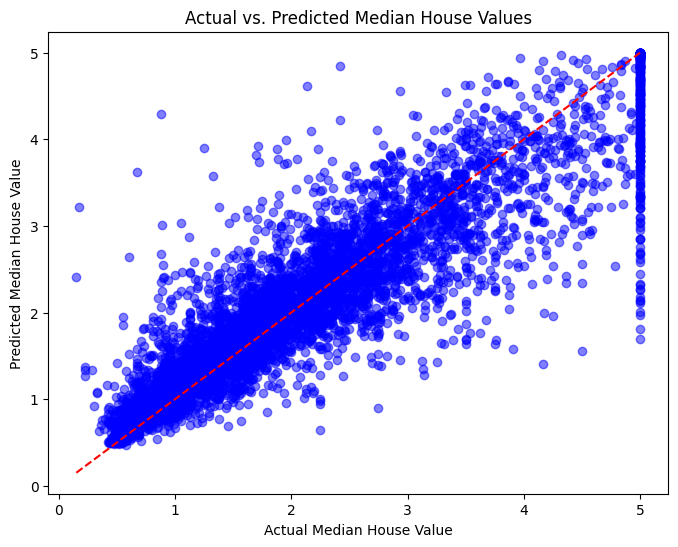

In [21]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# 10. Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Median House Values')
plt.show()